In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score # 轮廓系数
from sklearn.metrics import calinski_harabaz_score
from time import time
import warnings

warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
path='drive/My Drive/Colab Notebooks/cluster/lab7/data/Wholesale customers data.csv'

data = pd.read_csv(path)
print(data.head())
print(data.shape)
data = StandardScaler().fit_transform(data)
print(data[:])
data = np.array(data)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
(440, 8)
[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


In [34]:
# 使用默认参数，训练一次
t_start = time()
model = DBSCAN()
pred = model.fit_predict(data)
# print(pred)
t_end = time()
t = t_end - t_start
print('[DBSCAN] %d分钟%.3f秒' % (int(t / 60), t - 60 * int(t / 60)))
y_hat = model.labels_

# 获取聚类个数。（聚类结果中-1表示没有聚类为离散点）
n_clusters_ = len(set(y_hat)) - (1 if -1 in y_hat else 0)

print('聚类簇的个数为：', n_clusters)
silhouette_s = silhouette_score(data, model.labels_, metric='euclidean')
calinski_harabaz_s = calinski_harabaz_score(data, model.labels_)

print('轮廓系数：', silhouette_s)
print('calinski_harabaz_score：', calinski_harabaz_s)

[DBSCAN] 0分钟0.007秒
聚类簇的个数为： 8
轮廓系数： -0.1310428843570635
calinski_harabaz_score： 12.405932655137727


In [32]:
# 使用定义的参数，多次训练
# 参数：(epsilon, min_sample)
params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15),(0.4, 5), (0.4, 10), (0.4, 15), (0.5, 5), (0.5, 10), (0.5, 15), (0.6, 5), (0.6, 10), (0.6, 15)) 

n = []
y_silhouette_score = []
calinskiharabaz_score = []

t_start = time()
for i in range(2, 15+2):
    eps, min_samples = params[i-2]
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    y_hat = model.labels_

    # 获取聚类个数。（聚类结果中-1表示没有聚类为离散点）
    n_clusters_ = len(set(y_hat)) - (1 if -1 in y_hat else 0)
    
    # 这里要注意，仅在聚类数为2 <= n_labels <= n_samples - 1时Silhouette Coefficient和calinski_harabaz才有定义
    if 2 <= n_clusters_:
        silhouette_s = silhouette_score(data, y_hat, metric='euclidean')
        calinski_harabaz_s = calinski_harabaz_score(data, y_hat)
    else:
        silhouette_s = None
        calinski_harabaz_s = None
    
    print('[eps:', eps, 'min_samples:', min_samples,']聚类簇的个数为：', n_clusters_)
    print('轮廓系数：', silhouette_s)
    print('calinski_harabaz_score：', calinski_harabaz_s)
    
    n.append(i)
    y_silhouette_score.append(silhouette_s)
    calinskiharabaz_score.append(calinski_harabaz_s)

t_end = time()
t = t_end - t_start
print('[DBSCAN] %d分钟%.3f秒' % (int(t / 60), t - 60 * int(t / 60)))

[eps: 0.2 min_samples: 5 ]聚类簇的个数为： 3
轮廓系数： -0.2838188264010719
calinski_harabaz_score： 1.8768015502112705
[eps: 0.2 min_samples: 10 ]聚类簇的个数为： 0
轮廓系数： None
calinski_harabaz_score： None
[eps: 0.2 min_samples: 15 ]聚类簇的个数为： 0
轮廓系数： None
calinski_harabaz_score： None
[eps: 0.3 min_samples: 5 ]聚类簇的个数为： 1
轮廓系数： None
calinski_harabaz_score： None
[eps: 0.3 min_samples: 10 ]聚类簇的个数为： 1
轮廓系数： None
calinski_harabaz_score： None
[eps: 0.3 min_samples: 15 ]聚类簇的个数为： 1
轮廓系数： None
calinski_harabaz_score： None
[eps: 0.4 min_samples: 5 ]聚类簇的个数为： 2
轮廓系数： -0.012216234139125115
calinski_harabaz_score： 24.642772380889554
[eps: 0.4 min_samples: 10 ]聚类簇的个数为： 2
轮廓系数： -0.1394848101869551
calinski_harabaz_score： 16.200458125383204
[eps: 0.4 min_samples: 15 ]聚类簇的个数为： 1
轮廓系数： None
calinski_harabaz_score： None
[eps: 0.5 min_samples: 5 ]聚类簇的个数为： 8
轮廓系数： -0.1310428843570635
calinski_harabaz_score： 12.405932655137727
[eps: 0.5 min_samples: 10 ]聚类簇的个数为： 2
轮廓系数： 0.01180537661552262
calinski_harabaz_score： 27.223243679467295

Text(0.5, 1.0, 'n_clusters_--calinski_harabaz_score')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


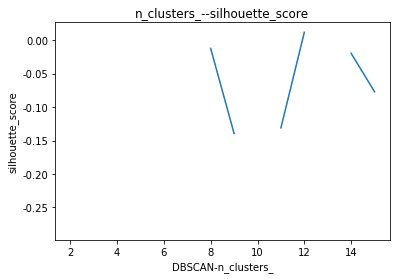

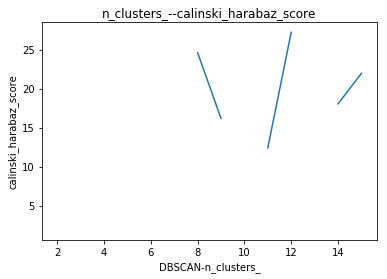

In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure()  
plt.plot(n,y_silhouette_score)  
plt.xlabel("DBSCAN-n_clusters_")  
plt.ylabel("silhouette_score")  
plt.title("n_clusters_--silhouette_score")  

plt.figure()  
plt.plot(n,calinskiharabaz_score)  
plt.xlabel("DBSCAN-n_clusters_")  
plt.ylabel("calinski_harabaz_score")  
plt.title("n_clusters_--calinski_harabaz_score")  
